IMDb Data Cleaning

Import necessary packages for analysis/visualisation

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

Set directory

In [2]:
os.chdir('/Users/Veerapen/Desktop/Movie Rating Project/Raw Data Files')

Read in IMDb Files and Filter for titles that are movies (there are also TV shows in there)

In [3]:
IMDb_ratings_data=pd.read_csv('title.ratings.tsv',sep='\t') 

In [4]:
IMDb_general_data=pd.read_csv('title.basics.tsv',sep='\t', low_memory=False)

In [5]:
#Joining the two IMDb datasets using the column tconst whichis an ID for the movies
IMDb_general_data = IMDb_general_data.merge(IMDb_ratings_data, on='tconst', how='left')

In [6]:
#Filtering out TV shows as this project is solely concerning films
IMDb_general_data = IMDb_general_data.loc[IMDb_general_data['titleType'] == 'movie']

In [7]:
IMDb_general_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,198.0
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,14.0
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,778.0
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,4.7,19.0
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,23.0


Metacritic Movie Ratings - Read in data

In [8]:
metacritic_ratings_data=pd.read_csv('metacritic_movies.csv')

In [9]:
metacritic_ratings_data.head()

,movie_title,release_date,genre,metascore
0,Anatomy of a Murder,01-Jul-59,"Drama,Mystery,Thriller,Crime",95
1,Bringing Up Baby,18-Feb-38,"Comedy,Romance,Family",91
2,After Life,12-May-99,"Drama,Fantasy",91
3,Gavagai,03-Aug-18,Drama,91
4,The Hustler,25-Sep-61,"Drama,Sport",90


Joining the ratings

In [10]:
#Here I join the two different ratings sets. As there is not a common movie id, i have used movie_title from metacritic and 'primaryTitle from IMDb
mixed_movie_data = metacritic_ratings_data.merge(IMDb_general_data, left_on='movie_title',right_on='primaryTitle',how='left')

In [11]:
mixed_movie_data.head()

,movie_title,release_date,genre,metascore,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,Anatomy of a Murder,01-Jul-59,"Drama,Mystery,Thriller,Crime",95,tt0052561,movie,Anatomy of a Murder,Anatomy of a Murder,0,1959,\N,161,"Drama,Mystery",8.0,66163.0
1,Anatomy of a Murder,01-Jul-59,"Drama,Mystery,Thriller,Crime",95,tt18949464,movie,Anatomy of a Murder,Anatomy of a Murder,0,\N,\N,\N,Drama,NaN,NaN
2,Bringing Up Baby,18-Feb-38,"Comedy,Romance,Family",91,tt0029947,movie,Bringing Up Baby,Bringing Up Baby,0,1938,\N,102,Comedy,7.8,61319.0
3,After Life,12-May-99,"Drama,Fantasy",91,tt0165078,movie,After Life,Wandafuru raifu,0,1998,\N,119,"Drama,Fantasy",7.6,12026.0
4,After Life,12-May-99,"Drama,Fantasy",91,tt16898038,movie,After Life,After Life,0,\N,\N,\N,Documentary,NaN,NaN


In [12]:
#Here I have removed the movies which do not have a rating on both websites as the purpose of this analysis is to compare the differences in ratings between the two
mixed_movie_data = mixed_movie_data[mixed_movie_data['averageRating'].notna()]

In [13]:
mixed_movie_data = mixed_movie_data[mixed_movie_data['metascore'].notna()]

In [14]:
#Here I removed films which had very few votes because they are liable to have extreme ratings and deyract from the value of the analysis
mixed_movie_data = mixed_movie_data.drop(mixed_movie_data[mixed_movie_data.numVotes < 200].index)

PART I: How generous are IMDb and metacritic with their ratings?
 - I will look at the two ratings plotted against each other to see the relationship between them
 - I will also look at the distributions of the ratings from each site on their own to see if there are obvious differences

In [15]:
#IMDb scores are on a scale from 0-10 not 0-100 like metacritic so i have scaled up the IMDb scores for ease of comparison
mixed_movie_data['IMDbScaled']=mixed_movie_data['averageRating']*10

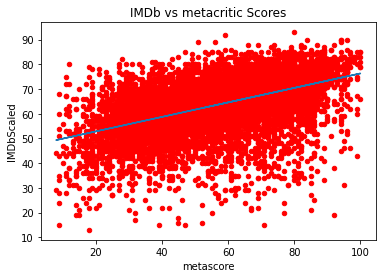

In [16]:
#Plotting the scores from the two different websites against each other to see how much the two systems agree
mixed_movie_data.plot(kind='scatter',x='metascore',y='IMDbScaled',color='red',title='IMDb vs metacritic Scores')
x=mixed_movie_data.metascore
y=mixed_movie_data.IMDbScaled
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)

# Display the Trendline
plt.plot(x, p(x))
plt.savefig('imdbbvsmetacritic_score_plot')

In [20]:
#It does look like there is some positive correlation so i have got the Pearson correlation to see the extent of this
mixed_movie_data['metascore'].corr(mixed_movie_data['IMDbScaled'])

0.5076321467181202

In [37]:
#Getting some descriptive statistics for reference in the article
print(mixed_movie_data['metascore'].median())
print(mixed_movie_data['IMDbScaled'].median())
print(mixed_movie_data['metascore'].mean())
print(mixed_movie_data['IMDbScaled'].mean())


59.0
65.0
57.814202419284655
63.95831520320251


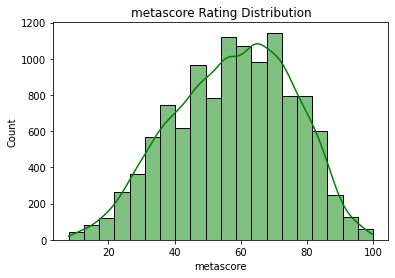

In [32]:
#Plotting a histogram of the ratings on metacritic to see how they are distributed (Using Seaborn)
sns.histplot(data = mixed_movie_data['metascore'],bins =20,kde=True,color='Green').set(title='metascore Rating Distribution')
plt.savefig('metacritic_hist.png')

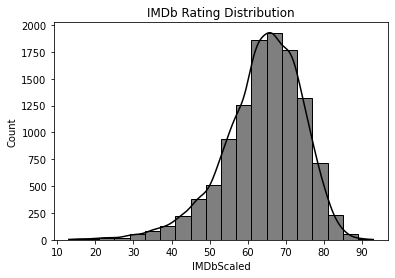

In [19]:
#Completing the same exercise for IMDb for use in the article so that I could compare the two distributions
sns.histplot(data = mixed_movie_data['IMDbScaled'],bins =20,kde=True,color='Black').set(title='IMDb Rating Distribution')

plt.savefig('IMDb_hist.png')

- As we can see the is a greater spread of values on metascore than IMDb.
- The ratings also tend to be higher on IMDb than metacritic

PART II: Does release year have any effect on which of the websites prefer a given movie?
- I first grouped the data by release_year and then averaged the ratings for two websites
- Then I plotted the difference between the two ratings by year

In [21]:
#In the datasets we still have the exact release dates for each movie, for ease of visualisation I added a column called release_year
mixed_movie_data['release_year'] =  pd.DatetimeIndex(mixed_movie_data['release_date']).year

In [22]:
#Here I group the data by release_year and find the mean ratings by year
by_year = mixed_movie_data.groupby(['release_year']).mean()

In [23]:
#I had to drop some of the data because they had been incorrectly inputted with release dates in the future
by_year.drop(by_year.tail(37).index,
        inplace = True)

In [24]:
#Defining the metric to track for this part of the analysis 
by_year['ScoreDiff']= by_year['IMDbScaled']-by_year['metascore']

In [25]:
#Has to be done due to the group by
by_year.reset_index()

,release_year,metascore,averageRating,numVotes,IMDbScaled,ScoreDiff
0,1972,74.444444,6.533333,42051.444444,65.333333,-9.111111
1,1973,70.562500,7.206250,93220.687500,72.062500,1.500000
2,1974,72.928571,6.742857,86140.428571,67.428571,-5.500000
3,1975,70.307692,6.838462,184363.153846,68.384615,-1.923077
4,1976,75.080000,7.048000,116454.520000,70.480000,-4.600000
5,1977,67.500000,6.692857,93294.071429,66.928571,-0.571429
6,1978,70.346154,6.538462,72574.615385,65.384615,-4.961538
7,1979,69.851852,7.144444,124265.962963,71.444444,1.592593
8,1980,61.696970,6.827273,131272.424242,68.272727,6.575758
9,1981,58.120000,6.556000,45624.040000,65.560000,7.440000


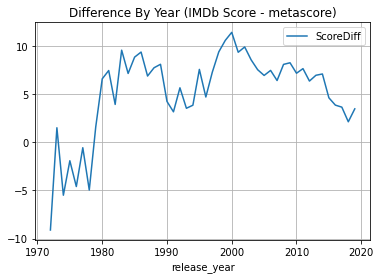

In [26]:
#Plotting the difference in scores over time
by_year.plot.line(y='ScoreDiff',grid=True,title='Difference By Year (IMDb Score - metascore)')
plt.savefig('scorediff_byyear.png')

- Looking at the graph we can see that the only time that the ScoreDiff is negative (aka metascore is higher than IMDb) is for films released in the 1970s
- After that IMDb ratings are higher to varying degrees over the years

PART III: Does genre have any effect on which of the websites prefer a given movie?
- I grouped the data by genre
- Then I plotted the difference between the two ratings by genre
- This was quite difficult as all of the films were given lots of categories

In [27]:
#Grouping the data by genre
ratings_by_genre = mixed_movie_data.groupby(['genre']).mean()

In [28]:
#Defining the metric to track for this graph (similar to the one used in part II)
ratings_by_genre['ScoreDiff']=ratings_by_genre['IMDbScaled']-ratings_by_genre['metascore']

In [29]:
#Only took genres with a lot of votes for the visualisation as there are far too many genre combinations to display on one graph otherwise
ratings_by_genre = ratings_by_genre[ratings_by_genre['numVotes']>650000]

In [30]:
#Tabulating the data due to the group by
ratings_by_genre.reset_index()

,genre,metascore,averageRating,numVotes,IMDbScaled,release_year,ScoreDiff
0,"Action,Adventure,Animation,Family",90.0,8.0,7.220550e+05,80.0,2004.000000,-10.0
1,"Action,Adventure,Drama,Crime,Western",81.0,8.4,1.515729e+06,84.0,2012.000000,3.0
2,"Action,Adventure,Drama,Thriller,Crime",78.0,8.4,1.671881e+06,84.0,2012.000000,6.0
3,"Action,Adventure,Fantasy,Romance,Family",63.0,8.1,1.108316e+06,81.0,2003.000000,18.0
4,"Action,Adventure,Sci-Fi,Drama,Comedy",80.0,8.0,8.377840e+05,80.0,2015.000000,0.0
5,"Action,Adventure,Sci-Fi,Drama,Fantasy,Comedy",74.0,7.9,7.261720e+05,79.0,2017.000000,5.0
6,"Action,Adventure,Sci-Fi,Mystery",43.0,6.2,6.694927e+05,62.0,2007.333333,19.0
7,"Action,Adventure,Sci-Fi,Thriller,Fantasy,Comed...",40.0,5.9,6.775480e+05,59.0,2016.000000,19.0
8,"Action,Adventure,Sci-Fi,Thriller,Fantasy,Comed...",65.0,8.0,1.011736e+06,80.0,2016.000000,15.0
9,"Action,Fantasy,War",52.0,7.6,8.106260e+05,76.0,2007.000000,24.0


/var/folders/th/6mr_9qjd17jfhcqxf5xgd9vm0000gr/T/ipykernel_96071/3891643067.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bb_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('scorediff_bygenre',bb_inches='tight',pad_inches =2)


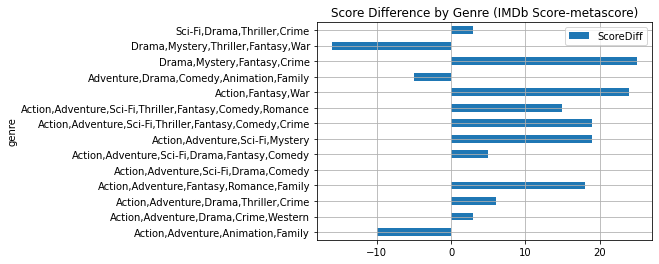

In [31]:
#Plotting the differences in score by genre
ratings_by_genre.plot.barh(y='ScoreDiff',grid= True,title='Score Difference by Genre (IMDb Score-metascore)')
plt.savefig('scorediff_bygenre',bb_inches='tight',pad_inches =2)

- It is hard to see given there are so many genres assigned to individual movies but there are a few popular genre combinations that are favoured on metacritic ahead of IMDb